# **Analysis of factors influencing student grades**
* The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.
* Correlation between features
* Weekly Consumption of Alcohol
* Final Exam Scores According to Students' alcohol consumption
* Final Exam Scores according to whether students are in a relationship.
* Final Exam Scores according to whether students use internet.
* Effect of alcohol consumption on grades of Portuguese (language) and Math (logic).
* Modeling and Prediction using Logistic Regression and other algorithms.

About the Dataset:<br/>
The students are from two Portuguese secondary schools. <br/>The ages of the students range from 15 to 22. <br/>There are multiple demographic variables
            included in our dataset to describe each student. <br/>Variables include information about the 
            student’s family. <br/>For example, the family size, parent’s cohabitation status, each parent’s
            educational background and job, and the student’s relationship with their family. <br/>All these
            variables are categorical.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv(r'C:\Users\Akshay\Downloads\student-alcohol-consumption\student-mat.csv')

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# I use final grade = G3, and weekly alcohol consumption = Dalc + Walc 
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


**Correlation between features**
* For broad perspective lets look at first correlation of features.

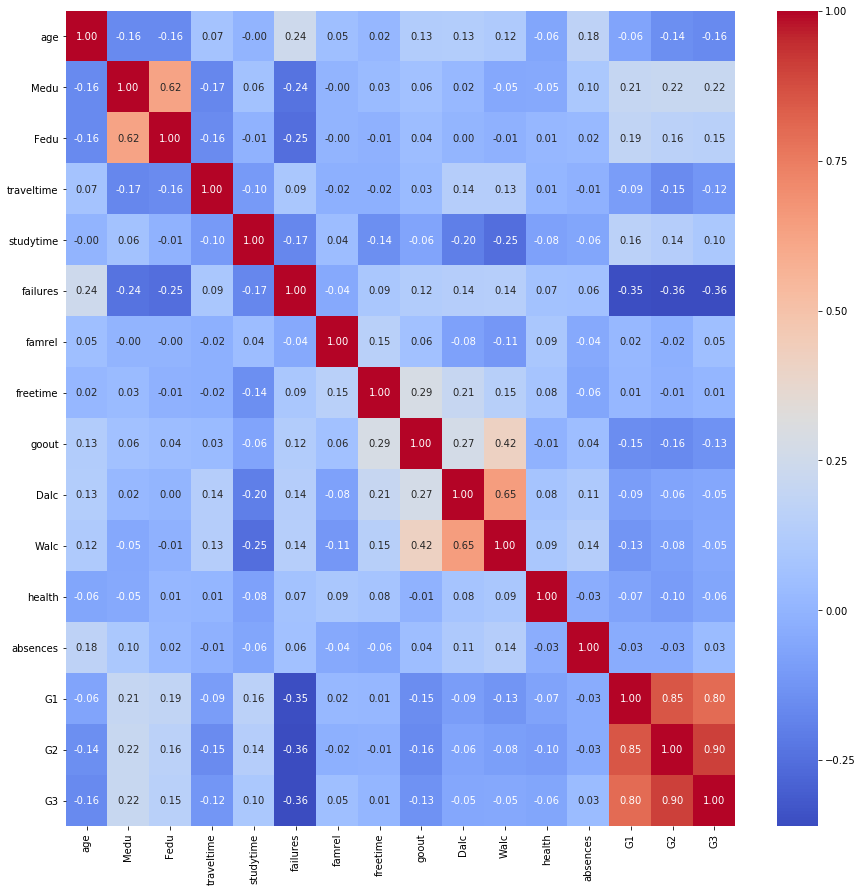

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True, cmap = "coolwarm")
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

As it can be seen from correlation map only exam scores are highly correlated with each other. It says that if students takes almost same grade at each exams.

# 1. Study effect of alcohol consumption on final grades of students

<a><img src="http://image.ibb.co/eqPopQ/alc.jpg" alt="alc" border="0"></a>

In [6]:
#data = pd.DataFrame(filedata['Dalc'],columns=['Dalc'])
#data['Walc'] = filedata['Walc']
#data['G3'] = filedata['G3']
dataTemp = pd.DataFrame(data[['Dalc','Walc','G3']],columns=['Dalc','Walc','G3'])

In [51]:
type(dataTemp)

pandas.core.frame.DataFrame

In [8]:
dataTemp.head()

,Dalc,Walc,G3
0,1,1,6
1,1,1,6
2,2,3,10
3,1,1,15
4,1,2,10


In [9]:
dataTemp['Dalc'].head()

0    1
1    1
2    2
3    1
4    1
Name: Dalc, dtype: int64

Combine weekdays alcohol consumption with weekend alcohol consumption.

In [10]:
dataTemp['Dalc'] = dataTemp['Dalc'] + dataTemp['Walc']

In [11]:
dataTemp['Dalc'].head()

0    2
1    2
2    5
3    2
4    3
Name: Dalc, dtype: int64

**Weekly Consumption of Alcohol**
* Students drink alcohol at least 2 times in a week.

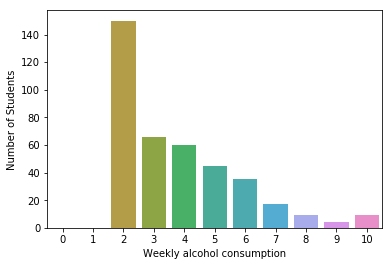

In [12]:
# There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.
list = []
for i in range(max(dataTemp.Dalc) + 1):
    list.append(len(dataTemp[dataTemp.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')
plt.show()

**Final Exam Scores According to Students' alcohol consumption**
* I visualize taken total grades according to alcohol consuption

[1621, 678, 622, 475, 315, 174, 94, 39, 96]
10.4151898734


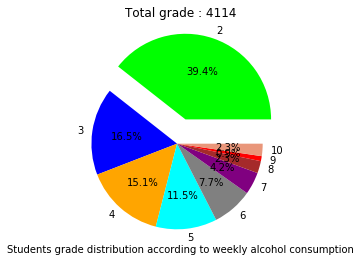

In [13]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0.3,0,0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(dataTemp[dataTemp.Dalc == i].G3))
print(sizes)
total_grade = sum(sizes)
average = total_grade/float(len(dataTemp))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')
print(average)
plt.show()

Well, it looks like students who consume alcohol 2 times in a week more successful than others. However, it actually cannot be understood from this graph. Because number of students who consume alcohol 2 times in a week more than others. Therefore, lets look at swarm plot to understand whether alcohol affects the success or not.

**Students grade with grade average according to alcohol consumption **
* Final exam average grade is 10.4
* In order to understand whether alcohol affects students success, we compare grades with average.

Below we add two columns:
1. ave_line - it contains the average score
2. average - it contains whether students are "above average" or "under average"

ave= 10.4151898734


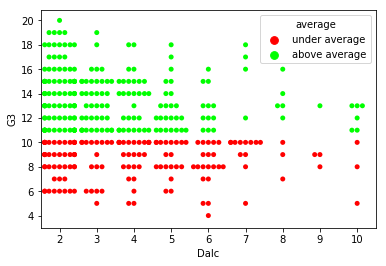

In [56]:
%matplotlib inline
ave = sum(data.G3)/float(len(data))
dataTemp2['ave_line'] = ave
dataTemp2['average'] = ['above average' if i > ave else 'under average' for i in dataTemp2.G3]



sns.swarmplot(x='Dalc', y = 'G3', hue = 'average',data= dataTemp2,palette={'above average':'lime', 'under average': 'red'})
print("ave=",ave)

As it can be seen swarm plot, student who takes highest grade consumes alcohol only 2 times in a week.

# 2. Study whether being in a romantic relationship affects final grades

In [15]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

From the dataframe, we choose only two columns for this study -> romantic and G3

In [16]:
dataRom = pd.DataFrame(data[['romantic','G3']], columns = ['romantic','G3'])

In [17]:
dataRom.head()

,romantic,G3
0,no,6
1,no,6
2,no,10
3,yes,15
4,no,10


 We see how many students are in a relationship and how many are not.
We use Barplot for this purpose.

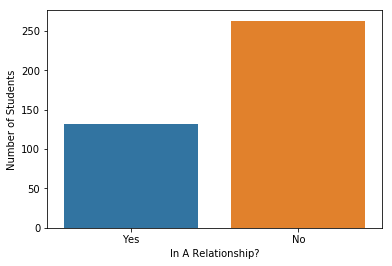

In [18]:
yesRom = len(dataRom[dataRom.romantic=='yes'])
noRom = len(dataRom[dataRom.romantic=='no'])
#print(yesRom)
#print(noRom)
ax = sns.barplot(x = ['Yes', 'No'], y = [yesRom, noRom])
plt.ylabel('Number of Students')
plt.xlabel('In A Relationship?')

Insight: Thus the number of students who are in a relationship are almost half the number of students who are not in a relationship

We now check the total grades according to whether the students are in a relationship or not.

[1264, 2850]
2057.0


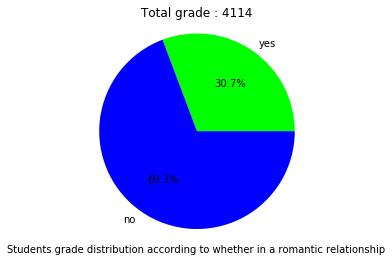

In [19]:
labels = ['yes', 'no']
colors = ['lime','blue']
explode = [0,0]

sumOfScores = []
sumOfScores.append(sum(dataRom[dataRom.romantic == 'yes'].G3))
sumOfScores.append(sum(dataRom[dataRom.romantic == 'no'].G3))

totalOfScores = sum(sumOfScores)

print(sumOfScores)
avg = totalOfScores/len(sumOfScores)
print(avg)

plt.pie(sumOfScores,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(totalOfScores))
plt.xlabel('Students grade distribution according to whether in a romantic relationship')
plt.show()


It can be seen from the pie chart that total grades of students not in a relationship is more than double the total grades of students in a relationship. However, the total number of students not in a relationship is also double than that of their counterparts. So the pie chart does not give a clear picture.

Thus we compare the data with the average score to get better insights.

[9.58, 10.84]


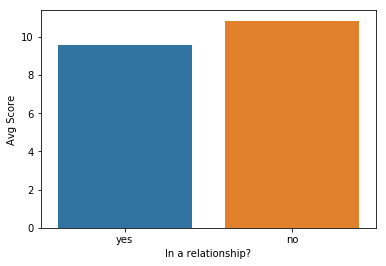

In [20]:
sumOfScores = []
sumOfScores.append(sum(dataRom[dataRom.romantic == 'yes'].G3))
sumOfScores.append(sum(dataRom[dataRom.romantic == 'no'].G3))

totalOfScores = sum(sumOfScores)

avg = totalOfScores/len(sumOfScores)
avgScores = [float('%.2f' %(sumOfScores[0]/yesRom)) , float('%.2f' %(sumOfScores[1]/noRom))]
print(avgScores)
axs = sns.barplot(x = ['yes','no'], y = avgScores)
plt.xlabel("In a relationship?")
plt.ylabel("Avg Score")

This barplot shows that the average score of the students in a relationship is slightly less than that of the students who are not in a relationship.

We use swarmplot and we compare the data with the average score and rate them as "above average" or "below average".

ave= 10.4151898734


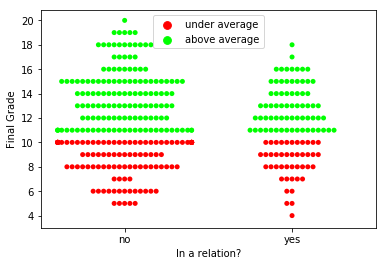

In [54]:
%matplotlib inline
ave = sum(dataRom.G3)/float(len(dataRom))

dataRom2 = pd.DataFrame(dataRom[dataRom.G3>0])

dataRom2['ave_line'] = ave
dataRom2['average'] = ['above average' if i > ave else 'under average' for i in dataRom2.G3]

sns.swarmplot(x='romantic', y = 'G3', hue = 'average',data= dataRom2,palette={'above average':'lime', 'under average': 'red'})
plt.xlabel("In a relation?")
plt.ylabel("Final Grade")
plt.legend(loc = "best")
print("ave=",ave)

It can be seen from the swarmplot that the density of green dots is higher for the students who are not in a relationship indicating that the chances of getting an "above average" grade increases if a student is not in a relationship.

# 3. Internet

# 4. Effect of consuming alcohol 2 times a week on the grades of Portuguese (language) and Math (logic)

Import the dataframe from the portuguese dataset

In [22]:
dataPor = pd.read_csv(r"C:\Users\Akshay\Downloads\student-alcohol-consumption\student-por.csv")

We add a new column "course" to the two dataframes dataPor (Portuguese course) and data (Math course). These columns will help us distinguish between the two courses in the merged dataframe

In [23]:
dataPor['course'] = "Portuguese"
data['course'] = "Math"

Merge the dataframes using pd.concat 

In [24]:
mergedData = pd.concat([data,dataPor])

In [25]:
mergedData.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'course'],
      dtype='object')

We add the daily consumption and the weekly consumption and put it in the daily consumption column

In [26]:
mergedData.Dalc = mergedData.Walc + mergedData.Dalc

In [27]:
mergedData.Dalc.head()

0    2
1    2
2    5
3    2
4    3
Name: Dalc, dtype: int64

In [28]:
studentsWhoDrankTwice = pd.DataFrame(mergedData[mergedData.Dalc==2])

We study the effect of alcohol consumption for 2 times a week on the grades of Math, a logical subject, and Portuguese, a language. 

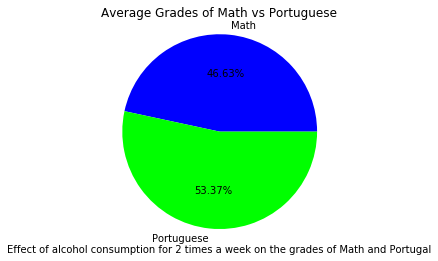

In [29]:
scorePortuguese = (studentsWhoDrankTwice[studentsWhoDrankTwice.course == "Portuguese"].G3)
scoreMath = (studentsWhoDrankTwice[studentsWhoDrankTwice.course == "Math"].G3)
colors = ['blue','lime']

avgMathScore = sum(scoreMath)/len(scoreMath)
avgPortuguese = sum(scorePortuguese)/len(scorePortuguese)
explode = [0,0]
labels = ["Math", "Portuguese"]
plt.pie([avgMathScore, avgPortuguese], colors=colors, explode = explode, labels = labels, autopct = "%.2f%%")
plt.axis("equal")
plt.title("Average Grades of Math vs Portuguese")
plt.xlabel("Effect of alcohol consumption for 2 times a week on the grades of Math and Portugal")

This pie chart is plotted between the average scores of Math and the average scores of Portuguese of students who drank 2 times a week. It can be seen that a student scores more on Portuguese as compared to that on Math.

Swarmplot gives a better graphical representation of this. 

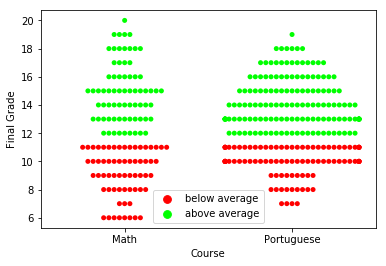

In [57]:
avgScoreOfstudentsWhoDrankTwice = sum(studentsWhoDrankTwice.G3) / len(studentsWhoDrankTwice.G3)

studentsWhoDrankTwice2 = pd.DataFrame(studentsWhoDrankTwice[studentsWhoDrankTwice.G3>0])

studentsWhoDrankTwice2["average"] = avgScoreOfstudentsWhoDrankTwice

studentsWhoDrankTwice2["performance"] = ["above average" if i > avgScoreOfstudentsWhoDrankTwice else "below average" for i in studentsWhoDrankTwice2.G3]


sns.swarmplot(x = "course", y = "G3", hue="performance", data = studentsWhoDrankTwice2, palette = {'above average' : 'lime', 'below average' : 'red'})
plt.xlabel("Course")
plt.ylabel("Final Grade")
plt.legend(loc = "best")

#scorePortuguese = (studentsWhoDrankTwice[studentsWhoDrankTwice.course == "Portuguese"].G3)
#scoreMath = (studentsWhoDrankTwice[studentsWhoDrankTwice.course == "Math"].G3)



# 5. Modeling and Prediction

In [31]:
data = pd.read_csv(r'C:\Users\Akshay\Downloads\student-alcohol-consumption\student-mat.csv')

In [32]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [33]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [34]:
data['Dalc'] = data['Dalc'] + data['Walc']

In [35]:
dataModel = pd.DataFrame(data[["reason","G3","Dalc","failures","goout","internet","romantic"]], columns = ["reason","G3",'Dalc',"failures","goout","internet","romantic"])

In [36]:
dataModel.head()

,reason,G3,Dalc,failures,goout,internet,romantic
0,course,6,2,0,4,no,no
1,course,6,2,0,3,yes,no
2,other,10,5,3,2,yes,no
3,home,15,2,0,2,yes,yes
4,home,10,3,0,2,no,no


In [37]:
averageGrade = sum(dataModel["G3"])/len(dataModel["G3"])
dataModel["Performance"] = [0 if i <= averageGrade else 1 for i in dataModel.G3]

In [38]:
dataModel.head()

,reason,G3,Dalc,failures,goout,internet,romantic,Performance
0,course,6,2,0,4,no,no,0
1,course,6,2,0,3,yes,no,0
2,other,10,5,3,2,yes,no,0
3,home,15,2,0,2,yes,yes,1
4,home,10,3,0,2,no,no,0


In [39]:
dataModel.internet = pd.Series(np.where(dataModel.internet.values == 'yes', 1, 0),dataModel.index)
dataModel.romantic = pd.Series(np.where(dataModel.romantic.values == 'yes', 1, 0),dataModel.index)

In [40]:
dataModel.reason.unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Create dummy variables for the 'department' and 'salary' features, since they are categorical 
# Mjob = pd.get_dummies(data=dataModel['Mjob'],drop_first=True,prefix='Mjob') #drop first column to avoid dummy trap
# Fjob = pd.get_dummies(data=dataModel['Fjob'],drop_first=True,prefix='Fjob') #drop first column to avoid dummy trap

reason_dummies = pd.get_dummies(data=dataModel['reason'],drop_first=False,prefix='reason')
# print(reason_dummies)
dataModel.drop(['reason','G3'],axis=1,inplace=True)
dataModel = pd.concat([dataModel,reason_dummies],axis=1)

In [42]:
dataModel.head()

,Dalc,failures,goout,internet,romantic,Performance,reason_course,reason_home,reason_other,reason_reputation
0,2,0,4,0,0,0,1,0,0,0
1,2,0,3,1,0,0,1,0,0,0
2,5,3,2,1,0,0,0,0,1,0
3,2,0,2,1,1,1,0,1,0,0
4,3,0,2,0,0,0,0,1,0,0


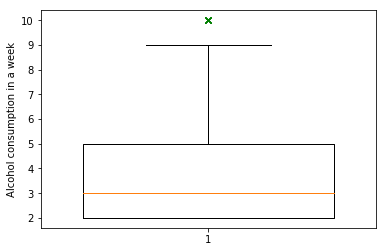

In [43]:
import matplotlib.pyplot as plt
plt.boxplot(dataModel.Dalc, sym='gx', widths=.75, notch=False)
plt.ylabel("Alcohol consumption in a week")
plt.show()

In [44]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [45]:
# Create train and test splits
target_name = 'Performance'
X = dataModel.drop('Performance', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y=dataModel[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=42)

In [46]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
# print(X_test.shape[0])
# print(X_test)
# print(y_base_rate)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.43


In [47]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.67


In [48]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=20)
modelCV = LogisticRegression()
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.669 (0.112)


# Input from user:
Taking input from user to predict whether he will get 'below average' or 'above average' grade:

Input order:
Dalc,	failures, goout,	internet,	romantic, reason_course,	reason_home,	reason_other,	reason_reputation

The user 
    <br/>=> drinks 4 times a week
    <br/>=> has no past course failures
    <br/>=> selected the school because of it's reputation 
    <br/>=> uses internet
    <br/>=> is in a relationship 


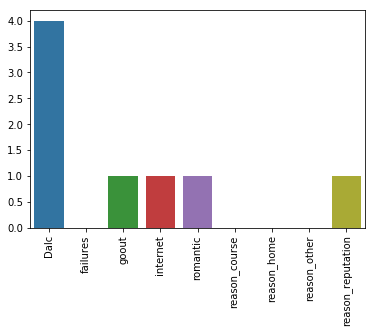

In [49]:
y__ = [4, 0, 1, 1, 1, 0, 0, 0, 1]
x__ = ["Dalc", "failures", "goout", "internet", "romantic", "reason_course", "reason_home", 
       "reason_other", "reason_reputation"]

axs = sns.barplot(x = x__, y = y__)
plt.xticks(rotation = 90)
user_test = np.array([y__])



Above average!


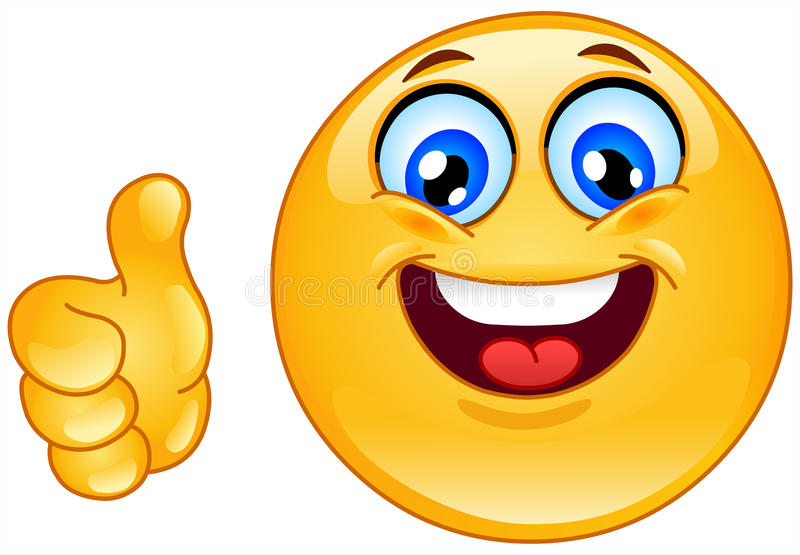

In [50]:
from IPython.display import Image
if model.predict(user_test) == 1:
    path = r"C:\Users\Akshay\Documents\Data Programming using PYTHON\Project\Images\Happy.jpg"
    result = "Above average!"
else:
    path = r"C:\Users\Akshay\Documents\Data Programming using PYTHON\Project\Images\Sad.jpg"
    result = "Below average!"

print()
print()
print(result)
Image(path, width="200px", height="100px")
# print('Above average :)' if model.predict(user_test)[0]==1 else 'Below average :(')